# Gráficas con los datos preprocesados

In [1]:
import numpy as np
#np.set_printoptions(threshold='nan')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Para abrir Explorador de archivos
from tkinter import Tk 
from tkinter.filedialog import askopenfilename
from tkinter import re #operaciones de matching de expresiones regulares

In [2]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):
    #data import
    data = pd.read_csv(path1).values
    amp = data[1:len(data),1:91]

    #plt
    fig = plt.figure(figsize = (18,15))
    ax1 = plt.subplot(311)
    plt.imshow(amp[:,0:29].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax1.set_title("Antenna A")
    plt.colorbar()

    ax2 = plt.subplot(312)
    plt.imshow(amp[:,30:59].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax2.set_title("Antenna B")
    plt.colorbar()

    ax3 = plt.subplot(313)
    plt.imshow(amp[:,60:89].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax3.set_title("Antenna C")
    plt.colorbar()
    plt.show()
    
    # Initializing valiables
    constant_offset = np.empty_like(amp)
    filtered_data = np.empty_like(amp)

    # Calculating the constant offset (moving average 20 seconds)
    for i in range(1, len(amp[0])):
        constant_offset[:,i] = moving_average(amp[:,i], len(amp[0]))

    # Calculating the filtered data (substract the constant offset)
    filtered_data = amp - constant_offset

    # Smoothing (moving average 0.01 seconds)
    for i in range(1, len(amp[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    # Calculate correlation matrix (90 * 90 dim)
    cov_mat2 = np.cov(filtered_data.T)
    # Calculate eig_val & eig_vec
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)
    # Sort the eig_val & eig_vec
    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]
    # Calculate H * eig_vec
    pca_data2 = filtered_data.dot(eig_vec2)
    
    #xmin = 0
    #xmax = 20000
    # plt
    fig3 = plt.figure(figsize = (18,30))

    ax1 = plt.subplot(611)
    plt.plot(pca_data2[:,0])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,0])
    ax1.set_title("PCA 1st component")

    ax2 = plt.subplot(612)
    plt.plot(pca_data2[:,1])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,1])
    ax2.set_title("PCA 2nd component")

    ax3 = plt.subplot(613)
    plt.plot(pca_data2[:,2])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 3rd component")

    ax4 = plt.subplot(614)
    plt.plot(pca_data2[:,3])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,3])
    ax4.set_title("PCA 4th component")

    ax5 = plt.subplot(615)
    plt.plot(pca_data2[:,4])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,4])
    ax5.set_title("PCA 5th component")

    ax6 = plt.subplot(616)
    plt.plot(pca_data2[:,5])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,5])
    ax6.set_title("PCA 6th component")

    plt.show()
    
    plt.figure(figsize = (18,30))
    # Spectrogram(STFT)
    plt.subplot(611)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,0], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(612)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,1], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(613)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,2], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(614)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,3], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(615)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,4], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.subplot(616)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,5], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.show()
    """
    plt.figure(figsize = (18,10))
    ax = plt.subplot(111)
    ax.magnitude_spectrum(pca_data2[:,0], Fs=1000, scale='dB', color='C1')
    # ax.magnitude_spectrum(pca_data2[5000:7500,0], Fs=1000, color='C1')
    plt.xlim(0,100)
    plt.ylim(0,1000)
    plt.show()
    """
    return [cov_mat2, eig_val2, eig_vec2, pca_data2]

## Se solicita el archivo csv

In [3]:
root = Tk() #Elimina la ventana de Tkinter
root.withdraw() #Ahora se cierra
file_path = askopenfilename() #Se abre el explorador de archivos y se guarda la selección
splitted = file_path.split("/")
file_name = splitted[-1]

In [4]:
#Se añaden los encabezados
csv_headers = "csi_headers.csv"
csv_cols = pd.read_csv(csv_headers)[1:91]
csv_col_list = csv_cols["Column_Names"].tolist()

In [5]:
folder_name = file_path.replace(file_name,'') 

## Nombre del archivo

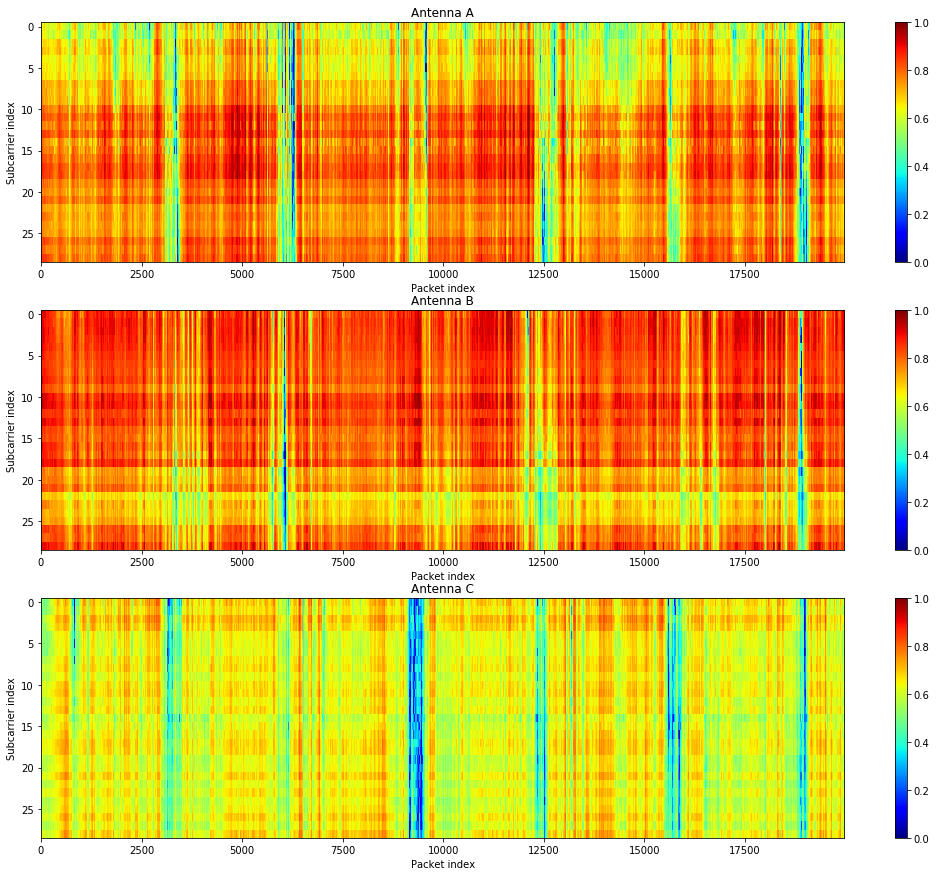

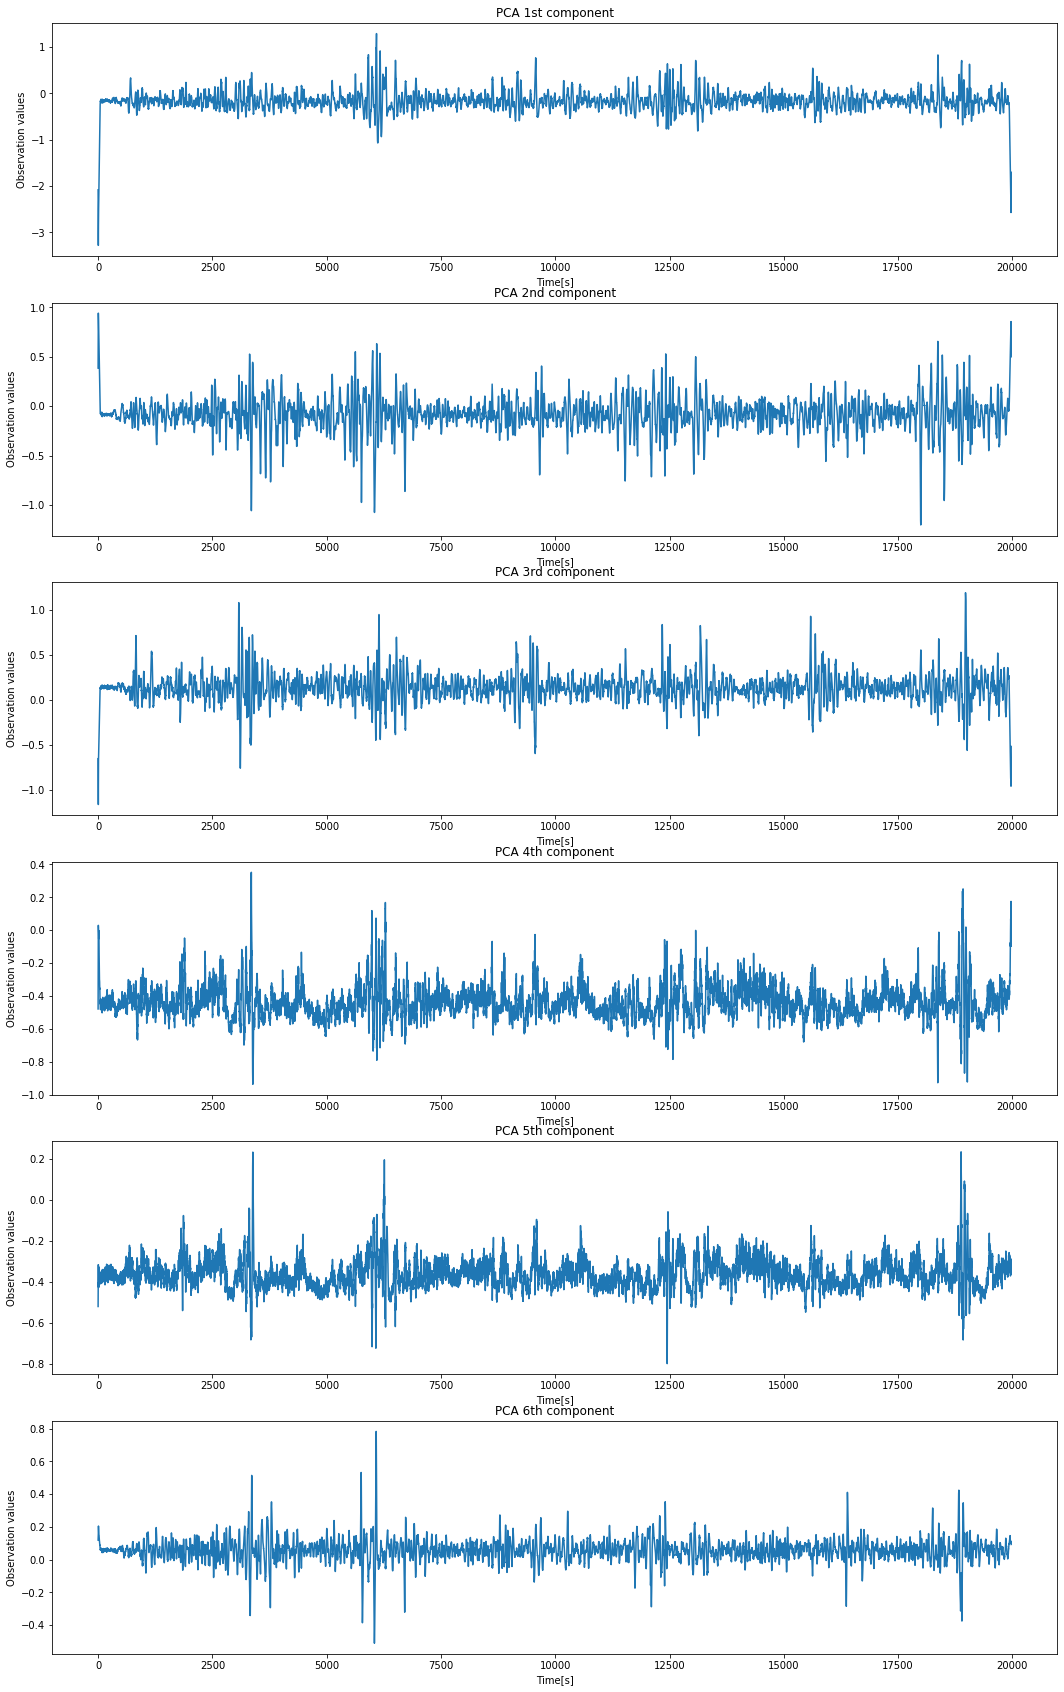

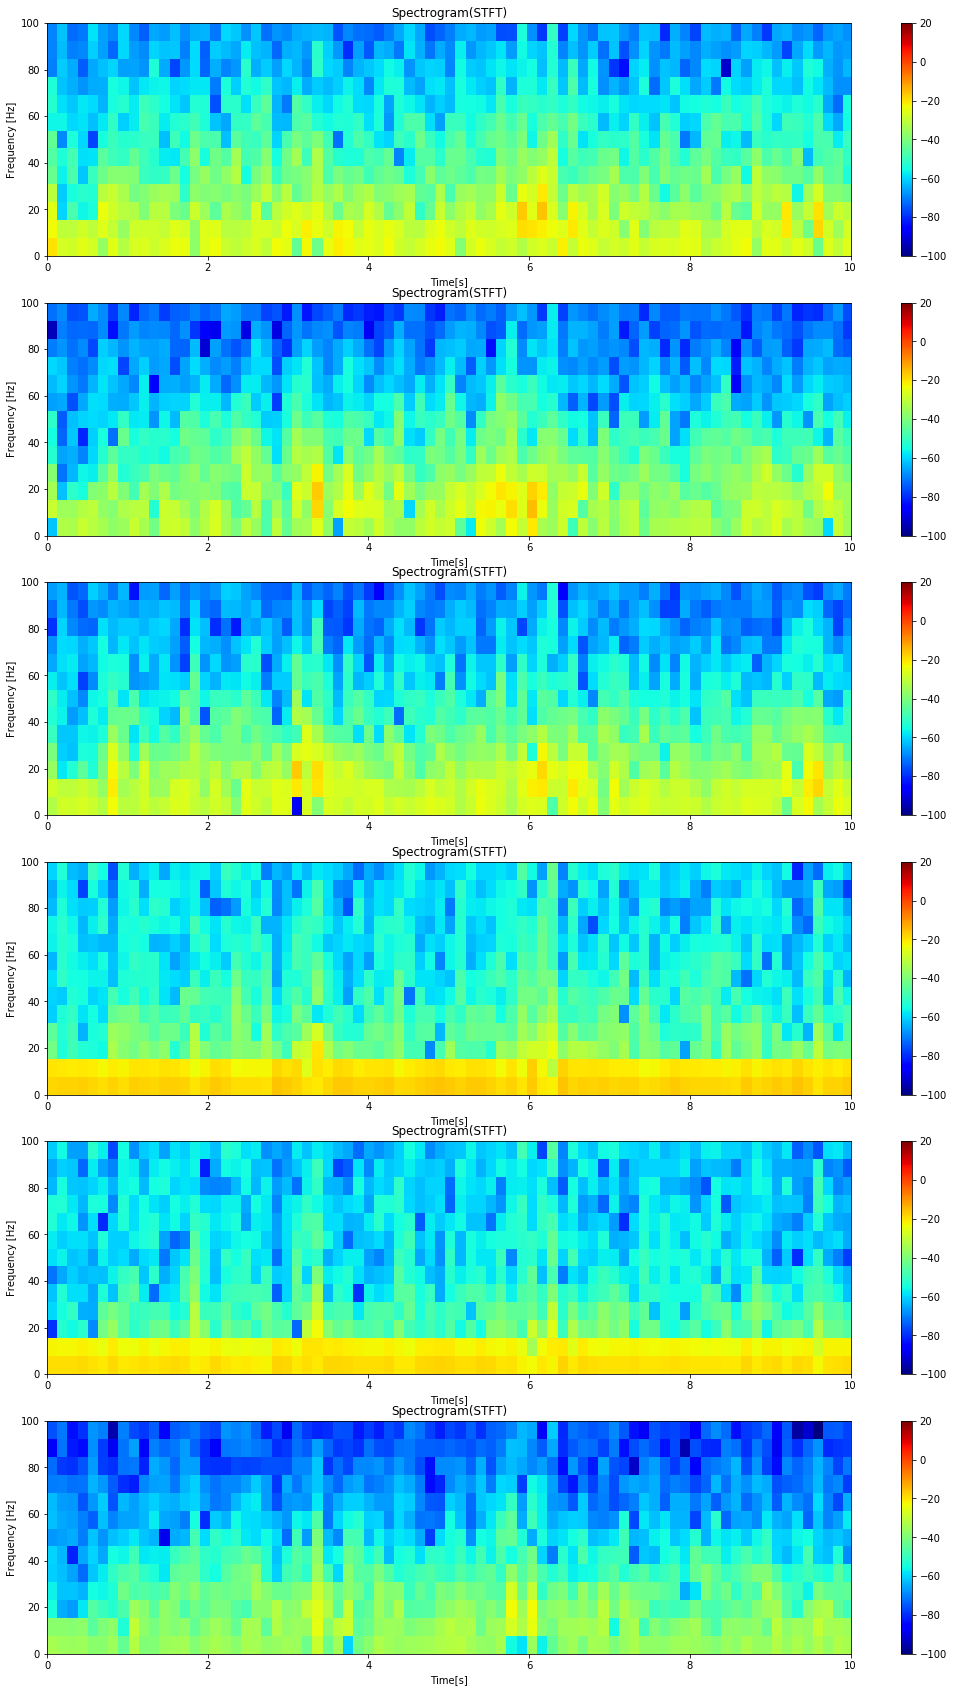

In [6]:
[cov_mat2, eig_val2, eig_vec2, pca_data2]= visualize(path1 = folder_name + "/" + file_name)

In [7]:
pca_data2

array([[-2.07985751e+00,  3.85464947e-01, -6.53252673e-01, ...,
        -6.55213921e-03,  6.51794407e-03, -1.50560234e-03],
       [-2.32957643e+00,  5.02758458e-01, -7.65876304e-01, ...,
        -5.35078974e-03,  6.90787496e-03, -1.97936742e-03],
       [-2.57169858e+00,  6.20902265e-01, -8.74897747e-01, ...,
        -5.07874852e-03,  7.09230212e-03, -2.03854034e-03],
       ...,
       [-2.14020617e+00,  6.87023029e-01, -7.46680539e-01, ...,
         2.14546374e-03,  5.56126480e-03, -1.23652536e-03],
       [-1.92456839e+00,  5.95000210e-01, -6.33431180e-01, ...,
         2.58574971e-03,  4.46191054e-03, -1.11507208e-03],
       [-1.70216612e+00,  5.00036511e-01, -5.17904301e-01, ...,
         2.54400222e-03,  2.40157832e-03, -6.60146019e-04]])

In [8]:
pcaDataFrame = pd.DataFrame(pca_data2, columns=csv_col_list)

In [9]:
pcaDataFrame

,antena_1_amp_sub1,antena_1_amp_sub2,antena_1_amp_sub3,antena_1_amp_sub4,antena_1_amp_sub5,antena_1_amp_sub6,antena_1_amp_sub7,antena_1_amp_sub8,antena_1_amp_sub9,antena_1_amp_sub10,...,antena_3_amp_sub21,antena_3_amp_sub22,antena_3_amp_sub23,antena_3_amp_sub24,antena_3_amp_sub25,antena_3_amp_sub26,antena_3_amp_sub27,antena_3_amp_sub28,antena_3_amp_sub29,antena_3_amp_sub30
0,-2.079858,0.385465,-0.653253,-0.479109,-0.520779,0.119068,0.044458,-0.011999,-0.068481,-0.027704,...,0.001004,0.009084,-0.003663,0.002660,-0.001932,0.000767,0.007895,-0.006552,0.006518,-0.001506
1,-2.329576,0.502758,-0.765876,-0.360533,-0.466980,0.124622,0.044649,-0.029397,-0.070138,-0.024631,...,-0.001408,0.010271,-0.005010,0.001723,-0.003755,0.001358,0.008258,-0.005351,0.006908,-0.001979
2,-2.571699,0.620902,-0.874898,-0.238037,-0.411790,0.128763,0.045521,-0.048203,-0.072298,-0.019690,...,-0.003294,0.011995,-0.006561,0.001863,-0.004637,0.001512,0.009532,-0.005079,0.007092,-0.002039
3,-2.804679,0.738402,-0.984447,-0.110358,-0.349091,0.132636,0.045460,-0.067626,-0.073952,-0.014550,...,-0.005968,0.013984,-0.009385,0.002358,-0.004472,0.001115,0.010579,-0.003857,0.007715,-0.001700
4,-3.046459,0.841717,-1.072968,-0.039760,-0.333665,0.144306,0.046727,-0.078110,-0.075668,-0.009536,...,-0.007254,0.015466,-0.011665,0.002257,-0.004051,0.000676,0.010757,-0.003105,0.008891,-0.000345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19970,-2.569662,0.855699,-0.958713,0.174965,-0.303415,0.104050,-0.095685,0.017534,-0.137577,0.006766,...,-0.011345,0.007544,-0.011650,-0.003810,0.007128,-0.007494,0.004188,0.001118,0.004549,-0.002734
19971,-2.349781,0.776696,-0.859683,0.145493,-0.288502,0.095768,-0.084845,0.015980,-0.126623,0.005243,...,-0.010526,0.006298,-0.011794,-0.003468,0.006698,-0.007292,0.003975,0.001820,0.005530,-0.001899
19972,-2.140206,0.687023,-0.746681,0.069392,-0.311349,0.095458,-0.072162,0.021550,-0.116969,0.004163,...,-0.009626,0.005118,-0.010723,-0.003301,0.006399,-0.006497,0.003971,0.002145,0.005561,-0.001237
19973,-1.924568,0.595000,-0.633431,-0.011090,-0.334628,0.093924,-0.058787,0.026870,-0.106079,0.004124,...,-0.008820,0.004809,-0.010182,-0.003359,0.005955,-0.005906,0.003845,0.002586,0.004462,-0.001115


In [10]:
pcaDataFrame.to_csv(r''+ 'pca' +'\pca_' + file_name, index = False, header=True)